# Project 1 - Paul's Analysis

In [1]:
#Import dependencies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import json
from scipy.stats import linregress
import datetime
import csv

### Create Data Frames

In [2]:
# Create a data frame that lists county data for the entire USA

discgolf_us_county_df = pd.DataFrame(pd.read_csv('Resources/dgolf_summary_area.csv'))
# del discgolf_us_county_df["State"]
discgolf_us_county_df

,Area_name,region,State,holeCount,rating,PopDensity,avg_income,MedianHHIncome,n_courses
0,"Abbeville County, SC",southeast,SC,9.000000,1.0,50.271,54735.849060,47219.0,1
1,"Acadia Parish, LA",southeast,LA,9.000000,2.0,95.506,54654.735380,45183.0,1
2,"Ada County, ID",west,ID,12.571429,2.4,423.772,101397.678474,73324.0,14
3,"Adair County, IA",midwest,IA,18.000000,NaN,12.514,56602.724360,55265.0,3
4,"Adair County, MO",midwest,MO,9.000000,NaN,44.639,50321.464650,49175.0,1
...,...,...,...,...,...,...,...,...,...
1967,"York County, SC",southeast,SC,11.736842,3.5,380.022,64753.664882,72579.0,19
1968,"York County, VA",southeast,VA,18.000000,4.0,645.036,93260.012850,91711.0,2
1969,"Young County, TX",southwest,TX,9.000000,NaN,19.808,69078.302145,54569.0,2
1970,"Yuba County, CA",west,CA,21.600000,4.0,119.481,77158.362734,56278.0,5


In [3]:
# Create a data frame that lists county data for the MidWest

discgolf_mw_county_df = discgolf_us_county_df.loc[discgolf_us_county_df["region"] == "midwest"]
discgolf_mw_county_df = discgolf_mw_county_df.reset_index()
del discgolf_mw_county_df["index"]
discgolf_mw_county_df

,Area_name,region,State,holeCount,rating,PopDensity,avg_income,MedianHHIncome,n_courses
0,"Adair County, IA",midwest,IA,18.0,NaN,12.514,56602.724360,55265.0,3
1,"Adair County, MO",midwest,MO,9.0,NaN,44.639,50321.464650,49175.0,1
2,"Adams County, IA",midwest,IA,18.0,NaN,8.799,55373.949580,56291.0,1
3,"Adams County, IL",midwest,IL,18.0,3.000000,77.674,66968.246685,57434.0,2
4,"Adams County, IN",midwest,IN,9.0,NaN,103.811,55081.666670,58602.0,1
...,...,...,...,...,...,...,...,...,...
768,"Wyandot County, OH",midwest,OH,18.0,3.000000,54.335,53990.354330,63516.0,1
769,"Wyandotte County, KS",midwest,KS,16.2,4.333333,1084.069,52410.868546,52223.0,5
770,"Yankton County, SD",midwest,SD,13.5,3.333333,43.589,62936.012860,57075.0,6
771,"Yellow Medicine County, MN",midwest,MN,9.0,NaN,13.000,55556.329437,62290.0,3


In [4]:
# Create a data frame that lists county data for Minnesota

discgolf_mn_county_df = discgolf_us_county_df.loc[discgolf_us_county_df["State"] == "MN"]
discgolf_mn_county_df = discgolf_mn_county_df.reset_index()
del discgolf_mn_county_df["index"]
discgolf_mn_county_df

,Area_name,region,State,holeCount,rating,PopDensity,avg_income,MedianHHIncome,n_courses
0,"Aitkin County, MN",midwest,MN,9.000000,NaN,8.692,55453.234903,49822.0,3
1,"Anoka County, MN",midwest,MN,12.846154,3.80,821.331,68822.568196,84779.0,13
2,"Becker County, MN",midwest,MN,10.500000,2.00,25.679,58157.248218,60159.0,6
3,"Beltrami County, MN",midwest,MN,13.500000,NaN,18.410,52061.904765,58138.0,2
4,"Benton County, MN",midwest,MN,13.500000,4.00,97.426,64098.319460,70143.0,4
...,...,...,...,...,...,...,...,...,...
74,"Watonwan County, MN",midwest,MN,9.000000,2.50,25.228,54161.183865,60656.0,2
75,"Wilkin County, MN",midwest,MN,9.000000,NaN,8.447,61026.737970,65769.0,2
76,"Winona County, MN",midwest,MN,16.200000,3.00,81.199,65874.258754,65302.0,5
77,"Wright County, MN",midwest,MN,14.200000,3.25,200.686,75624.396346,85855.0,10


In [5]:
# Clean the column headers of the USA data frame

discgolf_us_county_df.rename(columns = {"Area_name":"County Name, State", "region":"Region", "holeCount":"Average Hole Count",
                                   "rating":"Rating", "PopDensity":"Population Density", "avg_income":"Average Income",
                                   "MedianHHIncome":"Median Household Income", "n_courses":"Number of Courses"},
                        inplace = True)

discgolf_us_county_df["Average Hole Count"] = discgolf_us_county_df["Average Hole Count"].round(3)
discgolf_us_county_df["Population Density"] = discgolf_us_county_df["Population Density"].round(1)
discgolf_us_county_df["Average Income"] = discgolf_us_county_df["Average Income"].round(2)
discgolf_us_county_df["Median Household Income"] = discgolf_us_county_df["Median Household Income"].astype(np.int64)

discgolf_us_county_df

,"County Name, State",Region,State,Average Hole Count,Rating,Population Density,Average Income,Median Household Income,Number of Courses
0,"Abbeville County, SC",southeast,SC,9.000,1.0,50.3,54735.85,47219,1
1,"Acadia Parish, LA",southeast,LA,9.000,2.0,95.5,54654.74,45183,1
2,"Ada County, ID",west,ID,12.571,2.4,423.8,101397.68,73324,14
3,"Adair County, IA",midwest,IA,18.000,NaN,12.5,56602.72,55265,3
4,"Adair County, MO",midwest,MO,9.000,NaN,44.6,50321.46,49175,1
...,...,...,...,...,...,...,...,...,...
1967,"York County, SC",southeast,SC,11.737,3.5,380.0,64753.66,72579,19
1968,"York County, VA",southeast,VA,18.000,4.0,645.0,93260.01,91711,2
1969,"Young County, TX",southwest,TX,9.000,NaN,19.8,69078.30,54569,2
1970,"Yuba County, CA",west,CA,21.600,4.0,119.5,77158.36,56278,5


In [6]:
# Clean the column headers of the MidWest data frame

discgolf_mw_county_df.rename(columns = {"Area_name":"County Name, State", "region":"Region", "holeCount":"Hole Count",
                                      "rating":"Rating", "PopDensity":"Population Density", "avg_income":"Average Income",
                                      "MedianHHIncome":"Median Household Income", "n_courses":"Number of Courses"},
                           inplace = True)

discgolf_mw_county_df["Hole Count"] = discgolf_mw_county_df["Hole Count"].round(3)
discgolf_mw_county_df["Population Density"] = discgolf_mw_county_df["Population Density"].round(1)
discgolf_mw_county_df["Average Income"] = discgolf_mw_county_df["Average Income"].round(2)
discgolf_mw_county_df["Median Household Income"] = discgolf_mw_county_df["Median Household Income"].astype(np.int64)

discgolf_mw_county_df

,"County Name, State",Region,State,Hole Count,Rating,Population Density,Average Income,Median Household Income,Number of Courses
0,"Adair County, IA",midwest,IA,18.0,NaN,12.5,56602.72,55265,3
1,"Adair County, MO",midwest,MO,9.0,NaN,44.6,50321.46,49175,1
2,"Adams County, IA",midwest,IA,18.0,NaN,8.8,55373.95,56291,1
3,"Adams County, IL",midwest,IL,18.0,3.000000,77.7,66968.25,57434,2
4,"Adams County, IN",midwest,IN,9.0,NaN,103.8,55081.67,58602,1
...,...,...,...,...,...,...,...,...,...
768,"Wyandot County, OH",midwest,OH,18.0,3.000000,54.3,53990.35,63516,1
769,"Wyandotte County, KS",midwest,KS,16.2,4.333333,1084.1,52410.87,52223,5
770,"Yankton County, SD",midwest,SD,13.5,3.333333,43.6,62936.01,57075,6
771,"Yellow Medicine County, MN",midwest,MN,9.0,NaN,13.0,55556.33,62290,3


In [7]:
# Clean the column headers of the Minnesota data frame

discgolf_mn_county_df.rename(columns = {"Area_name":"County Name, State", "region":"Region", "holeCount":"Hole Count",
                                      "rating":"Rating", "PopDensity":"Population Density", "avg_income":"Average Income",
                                      "MedianHHIncome":"Median Household Income", "n_courses":"Number of Courses"},
                           inplace = True)

discgolf_mn_county_df["Hole Count"] = discgolf_mn_county_df["Hole Count"].round(3)
discgolf_mn_county_df["Population Density"] = discgolf_mn_county_df["Population Density"].round(1)
discgolf_mn_county_df["Average Income"] = discgolf_mn_county_df["Average Income"].round(2)
discgolf_mn_county_df["Median Household Income"] = discgolf_mn_county_df["Median Household Income"].astype(np.int64)

discgolf_mn_county_df

,"County Name, State",Region,State,Hole Count,Rating,Population Density,Average Income,Median Household Income,Number of Courses
0,"Aitkin County, MN",midwest,MN,9.000,NaN,8.7,55453.23,49822,3
1,"Anoka County, MN",midwest,MN,12.846,3.80,821.3,68822.57,84779,13
2,"Becker County, MN",midwest,MN,10.500,2.00,25.7,58157.25,60159,6
3,"Beltrami County, MN",midwest,MN,13.500,NaN,18.4,52061.90,58138,2
4,"Benton County, MN",midwest,MN,13.500,4.00,97.4,64098.32,70143,4
...,...,...,...,...,...,...,...,...,...
74,"Watonwan County, MN",midwest,MN,9.000,2.50,25.2,54161.18,60656,2
75,"Wilkin County, MN",midwest,MN,9.000,NaN,8.4,61026.74,65769,2
76,"Winona County, MN",midwest,MN,16.200,3.00,81.2,65874.26,65302,5
77,"Wright County, MN",midwest,MN,14.200,3.25,200.7,75624.40,85855,10


In [8]:
# Sorted MN data frame by highest median household income

discgolf_mn_county_df.sort_values(by=['Median Household Income'], ascending=False).head()

,"County Name, State",Region,State,Hole Count,Rating,Population Density,Average Income,Median Household Income,Number of Courses
8,"Carver County, MN",midwest,MN,12.167,3.200000,283.4,95613.66,107932,6
73,"Washington County, MN",midwest,MN,11.429,1.500000,659.2,96342.59,101409,7
63,"Scott County, MN",midwest,MN,12.750,3.000000,402.2,88477.97,99924,4
64,"Sherburne County, MN",midwest,MN,13.500,3.250000,215.4,68410.72,92673,6
17,"Dakota County, MN",midwest,MN,12.462,3.666667,743.9,87113.39,90562,13


### Create functions for graphing the data

In [9]:
# Define a function to graph the data

def plot_graph(x_value, y_value, title, x_label, y_label):
    
    plt.scatter(x_value, y_value, marker="o", facecolors="royalblue", edgecolors="black",s=30, alpha=0.75)
    
    #column_names = list(discgolf_us_county_df.columns)
    
    plt.title(title)
    
    plt.xlabel(x_label)
    
    plt.ylabel(y_label)
    
    plt.grid(True)

In [10]:
# Define a function to create a linear regression line

def plot_linreg(x_value, y_value):
    
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
    
    line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
    r_eq = "r-value = " + str(round(rvalue,3))
    
    regress_values = x_value * slope + intercept
    
    plt.plot(x_value, regress_values, "r-")
    
    plt.annotate(line_eq,(x_value.max()/2, y_value.max()/1.25), fontsize=15, color="red")
    plt.annotate(r_eq,(x_value.max()/2, y_value.max()/1.45), fontsize=15, color="red")
    
    print(f"The r-value is: {rvalue}")

### Graphing the data

The r-value is: 0.26364691984107563


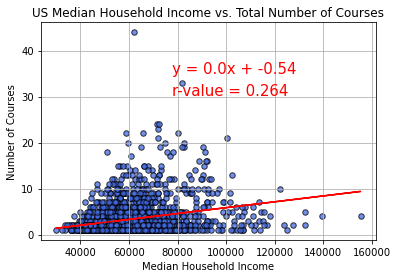

In [11]:
# Median Household Income vs. Number of Courses Analysis (USA)

plot_graph(discgolf_us_county_df["Median Household Income"],
           discgolf_us_county_df["Number of Courses"],
           "US Median Household Income vs. Total Number of Courses",
           "Median Household Income",
           "Number of Courses")

plot_linreg(discgolf_us_county_df["Median Household Income"], discgolf_us_county_df["Number of Courses"])

plt.savefig("US_MedIncome_Courses.png", dpi=80)

The r-value is: 0.3354988210113527


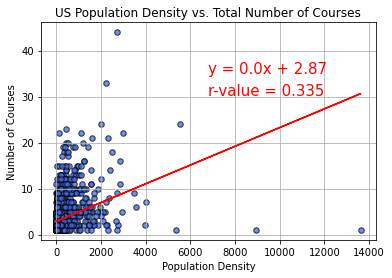

In [12]:
# Population Density vs. Number of Courses Analysis (USA)

plot_graph(discgolf_us_county_df["Population Density"],
           discgolf_us_county_df["Number of Courses"],
           "US Population Density vs. Total Number of Courses",
           "Population Density",
           "Number of Courses")

plot_linreg(discgolf_us_county_df["Population Density"], discgolf_us_county_df["Number of Courses"])

plt.savefig("US_PopDen_Courses.png", dpi=80)

The r-value is: 0.3464784543713047


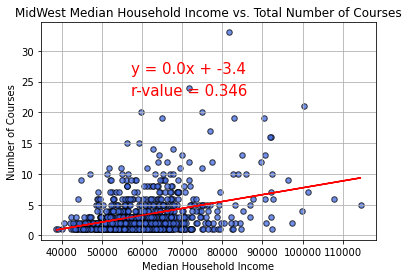

In [13]:
# Median Household Income vs. Number of Courses Analysis (MidWest)

plot_graph(discgolf_mw_county_df["Median Household Income"],
           discgolf_mw_county_df["Number of Courses"],
           "MidWest Median Household Income vs. Total Number of Courses",
           "Median Household Income",
           "Number of Courses")

plot_linreg(discgolf_mw_county_df["Median Household Income"], discgolf_mw_county_df["Number of Courses"])

plt.savefig("MidWest_MedIncome_Courses.png", dpi=80)

The r-value is: 0.5906022341270457


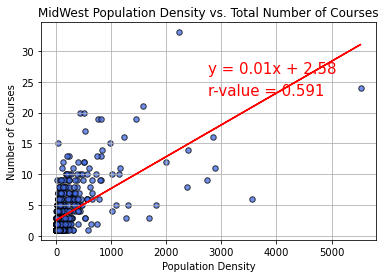

In [14]:
# Population Density vs. Number of Courses Analysis (MidWest)

plot_graph(discgolf_mw_county_df["Population Density"],
           discgolf_mw_county_df["Number of Courses"],
           "MidWest Population Density vs. Total Number of Courses",
           "Population Density",
           "Number of Courses")

plot_linreg(discgolf_mw_county_df["Population Density"], discgolf_mw_county_df["Number of Courses"])

plt.savefig("MidWest_PopDen_Courses.png", dpi=80)

The r-value is: 0.4288152905270823


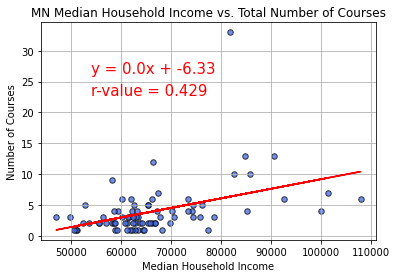

In [15]:
# Median Household Income vs. Number of Courses Analysis (Minnesota)

plot_graph(discgolf_mn_county_df["Median Household Income"],
           discgolf_mn_county_df["Number of Courses"],
           "MN Median Household Income vs. Total Number of Courses",
           "Median Household Income",
           "Number of Courses")
    
plot_linreg(discgolf_mn_county_df["Median Household Income"], discgolf_mn_county_df["Number of Courses"])

plt.savefig("Minnesota_MedIncome_Courses.png", dpi=80)

The r-value is: 0.5686336530630051


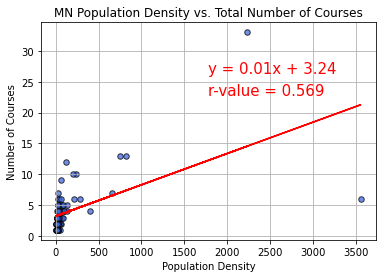

In [16]:
# Population Density vs. Number of Courses Analysis (Minnesota)

plot_graph(discgolf_mn_county_df["Population Density"],
           discgolf_mn_county_df["Number of Courses"],
           "MN Population Density vs. Total Number of Courses",
           "Population Density",
           "Number of Courses")

plot_linreg(discgolf_mn_county_df["Population Density"], discgolf_mn_county_df["Number of Courses"])

plt.savefig("Minnesota_PopDen_Courses.png", dpi=80)

### Create Nicely Formatted Data Frames

In [17]:
# Formatted Data Frame for USA

formatted_us_df = discgolf_us_county_df

formatted_us_df.loc[:, "Average Income"] = formatted_us_df["Average Income"].map('{:,.0f}'.format)
formatted_us_df.loc[:, "Median Household Income"] = formatted_us_df["Median Household Income"].map('{:,.0f}'.format)
formatted_us_df["Average Income"] = "$" + formatted_us_df["Average Income"]
formatted_us_df["Median Household Income"] = "$" + formatted_us_df["Median Household Income"]

formatted_us_df

,"County Name, State",Region,State,Average Hole Count,Rating,Population Density,Average Income,Median Household Income,Number of Courses
0,"Abbeville County, SC",southeast,SC,9.000,1.0,50.3,"$54,736","$47,219",1
1,"Acadia Parish, LA",southeast,LA,9.000,2.0,95.5,"$54,655","$45,183",1
2,"Ada County, ID",west,ID,12.571,2.4,423.8,"$101,398","$73,324",14
3,"Adair County, IA",midwest,IA,18.000,NaN,12.5,"$56,603","$55,265",3
4,"Adair County, MO",midwest,MO,9.000,NaN,44.6,"$50,321","$49,175",1
...,...,...,...,...,...,...,...,...,...
1967,"York County, SC",southeast,SC,11.737,3.5,380.0,"$64,754","$72,579",19
1968,"York County, VA",southeast,VA,18.000,4.0,645.0,"$93,260","$91,711",2
1969,"Young County, TX",southwest,TX,9.000,NaN,19.8,"$69,078","$54,569",2
1970,"Yuba County, CA",west,CA,21.600,4.0,119.5,"$77,158","$56,278",5


In [18]:
# Formatted Data Frame for MidWest

formatted_mw_df = discgolf_mw_county_df

formatted_mw_df.loc[:, "Average Income"] = formatted_mw_df["Average Income"].map('{:,.0f}'.format)
formatted_mw_df.loc[:, "Median Household Income"] = formatted_mw_df["Median Household Income"].map('{:,.0f}'.format)
formatted_mw_df["Average Income"] = "$" + formatted_mw_df["Average Income"]
formatted_mw_df["Median Household Income"] = "$" + formatted_mw_df["Median Household Income"]

formatted_mw_df

,"County Name, State",Region,State,Hole Count,Rating,Population Density,Average Income,Median Household Income,Number of Courses
0,"Adair County, IA",midwest,IA,18.0,NaN,12.5,"$56,603","$55,265",3
1,"Adair County, MO",midwest,MO,9.0,NaN,44.6,"$50,321","$49,175",1
2,"Adams County, IA",midwest,IA,18.0,NaN,8.8,"$55,374","$56,291",1
3,"Adams County, IL",midwest,IL,18.0,3.000000,77.7,"$66,968","$57,434",2
4,"Adams County, IN",midwest,IN,9.0,NaN,103.8,"$55,082","$58,602",1
...,...,...,...,...,...,...,...,...,...
768,"Wyandot County, OH",midwest,OH,18.0,3.000000,54.3,"$53,990","$63,516",1
769,"Wyandotte County, KS",midwest,KS,16.2,4.333333,1084.1,"$52,411","$52,223",5
770,"Yankton County, SD",midwest,SD,13.5,3.333333,43.6,"$62,936","$57,075",6
771,"Yellow Medicine County, MN",midwest,MN,9.0,NaN,13.0,"$55,556","$62,290",3


In [19]:
# Formatted Data Frame for Minnesota

formatted_mn_df = discgolf_mn_county_df

formatted_mn_df.loc[:, "Average Income"] = formatted_mn_df["Average Income"].map('{:,.0f}'.format)
formatted_mn_df.loc[:, "Median Household Income"] = formatted_mn_df["Median Household Income"].map('{:,.0f}'.format)
formatted_mn_df["Average Income"] = "$" + formatted_mn_df["Average Income"]
formatted_mn_df["Median Household Income"] = "$" + formatted_mn_df["Median Household Income"]

formatted_mn_df

,"County Name, State",Region,State,Hole Count,Rating,Population Density,Average Income,Median Household Income,Number of Courses
0,"Aitkin County, MN",midwest,MN,9.000,NaN,8.7,"$55,453","$49,822",3
1,"Anoka County, MN",midwest,MN,12.846,3.80,821.3,"$68,823","$84,779",13
2,"Becker County, MN",midwest,MN,10.500,2.00,25.7,"$58,157","$60,159",6
3,"Beltrami County, MN",midwest,MN,13.500,NaN,18.4,"$52,062","$58,138",2
4,"Benton County, MN",midwest,MN,13.500,4.00,97.4,"$64,098","$70,143",4
...,...,...,...,...,...,...,...,...,...
74,"Watonwan County, MN",midwest,MN,9.000,2.50,25.2,"$54,161","$60,656",2
75,"Wilkin County, MN",midwest,MN,9.000,NaN,8.4,"$61,027","$65,769",2
76,"Winona County, MN",midwest,MN,16.200,3.00,81.2,"$65,874","$65,302",5
77,"Wright County, MN",midwest,MN,14.200,3.25,200.7,"$75,624","$85,855",10


### Create a data frame grouped by region and then graph

In [20]:
# Create a data frame that lists region data for the entire USA

discgolf_region_df_all = pd.DataFrame(pd.read_csv('Resources/draft_dgolf_regionsummary.csv'))
discgolf_region_df_all

,region,avg_income,holeCount,rating,n_courses,total_income
0,midwest,65654.105181,12.761250,3.305738,2689,1475678076
1,northeast,76394.097631,14.861514,3.416107,621,383306400
2,southeast,63356.492395,14.723153,3.454545,1611,1147142374
3,southwest,68164.100045,13.778075,3.336700,748,658702828
4,west,73987.123983,13.763851,3.344954,1101,880245720


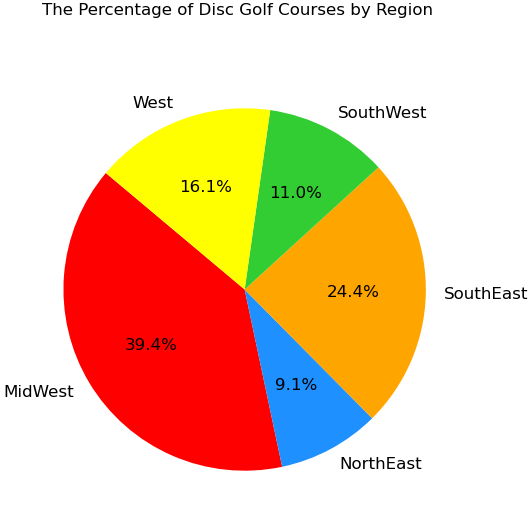

In [21]:
# Labels for the sections of the pie chart that splits the USA into regions
labels = ["MidWest", "NorthEast", "SouthEast", "SouthWest", "West"]

# The values of each section of the pie chart
sizes = [2689, 621, 1661, 748, 1101]

# The colors of each section of the pie chart
colors = ["red", "dodgerblue", "orange", "limegreen", "yellow"]

plt.figure(figsize=(20, 20), dpi=30)
plt.pie(sizes, labels=labels, colors=colors, autopct="%1.1f%%", shadow=False, startangle=140, textprops={'fontsize': 40})
plt.suptitle('The Percentage of Disc Golf Courses by Region', fontsize=40)
plt.savefig("RegionPieChart.png", dpi=80)